# Activity 2.3 - CNN Network Architectures

## Objective(s):

This activity aims to introduce how to use CNN network architectures

## Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

## Resources:
* Jupyter Notebook
* MNIST

## Procedures
Load the necessary libraries

In [1]:
# install opencv if you haven't
# !pip install opencv-python
# !pip install pillow

In [2]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [3]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [4]:
def save_webcam_image(img_path):

    try:
        camera_port = 1
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [5]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

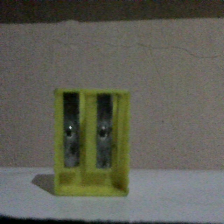

In [6]:
img = Image.open(img_path)
img

*The image displayed is a pencil sharpener.*

Use VGG-16 pre-trained model

In [7]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [8]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [9]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


,Predicted Class,Name,Probability
0,n03908714,pencil_sharpener,0.394373
1,n03075370,combination_lock,0.168792
2,n04125021,safe,0.134489
3,n04372370,switch,0.106480
4,n03666591,lighter,0.071369
5,n04254120,soap_dispenser,0.022029
6,n03902125,pay-phone,0.013067
7,n02978881,cassette,0.007844
8,n03187595,dial_telephone,0.004705
9,n03794056,mousetrap,0.004085


Interpret the result of prediction using VGG16 model

*The results display the predictions made by the VGG16 model. As humans, we recognize the image as a pencil sharpener, but for the model, it must using filters, strides, and other parameters. The table contains columns representing the predicted class, its name, and the probability. For the VGG16 model, it predicts the class n03908714 with a probability of 39.44%, indicating that the image most likely depicts a pencil sharpener. Other predicted classes with probabilities below 39.44% likely resemble the captured image from the camera*

Use Resnet50 pretrained model

In [10]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Predict the result

In [11]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


,Predicted Class,Name,Probability
0,n03908714,pencil_sharpener,0.913743
1,n04254120,soap_dispenser,0.015004
2,n03666591,lighter,0.007776
3,n03902125,pay-phone,0.006289
4,n04116512,rubber_eraser,0.004105
5,n02971356,carton,0.003769
6,n03742115,medicine_chest,0.002790
7,n02843684,birdhouse,0.002388
8,n04372370,switch,0.001928
9,n03196217,digital_clock,0.001731


Interpret the result using RESNET50 pretrained model

*The result obtained from the RESNET50 pretrained model indicates that the image was predicted as a pencil sharpener with a probability of 91.37%. Other predicted classes, which have probabilities below 91%, are likely to resemble the image according to the model. However, the probability of these classes is lower, with 1.50% indicating that the image is most likely to be a soap dispenser. This low probability suggests that the image does not depict a soap dispenser, light, payphone, etc.*

## Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

In [75]:
## importing libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

In [16]:
image_path = 'C:/Users/trich/OneDrive/Documents/GitHub/CPE-313/webcam_test_img.png'

In [24]:
## Load the image

def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize image
    img_array = np.array(img)
    return img_array

width, height = img.size

In [18]:
## Preprocess image based on the model requirements

def preprocess_image(img, model_name):
    if model_name == 'ResNet50':
        return preprocess_resnet50(img)
    elif model_name == 'VGG16':
        return preprocess_vgg16(img)
    elif model_name == 'MobileNetV2':
        return preprocess_mobilenetv2(img)
    else:
        raise ValueError("Invalid model name")

In [19]:
def predict(model, img):
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    return pred

In [20]:
resnet50_model = ResNet50(weights='imagenet')
vgg16_model = VGG16(weights='imagenet')
mobilenetv2_model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [47]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


,Predicted Class,Name,Probability
0,n03908714,pencil_sharpener,0.913743
1,n04254120,soap_dispenser,0.015004
2,n03666591,lighter,0.007776
3,n03902125,pay-phone,0.006289
4,n04116512,rubber_eraser,0.004105
5,n02971356,carton,0.003769
6,n03742115,medicine_chest,0.002790
7,n02843684,birdhouse,0.002388
8,n04372370,switch,0.001928
9,n03196217,digital_clock,0.001731


In [48]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,Predicted Class,Name,Probability
0,n03908714,pencil_sharpener,0.394373
1,n03075370,combination_lock,0.168792
2,n04125021,safe,0.134489
3,n04372370,switch,0.106480
4,n03666591,lighter,0.071369
5,n04254120,soap_dispenser,0.022029
6,n03902125,pay-phone,0.013067
7,n02978881,cassette,0.007844
8,n03187595,dial_telephone,0.004705
9,n03794056,mousetrap,0.004085


In [77]:
resizedimg = image.img_to_array(img)
finalimg = np.expand_dims(resizedimg,axis=0)
finalimg = tf.keras.applications.mobilenet_v2.preprocess_input(finalimg)
finalimg.shape
predictions = mobilenetv2_model.predict(finalimg)
 
# To predict and decode the image details
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


[[('n04116512', 'rubber_eraser', 0.1212191),
  ('n03908714', 'pencil_sharpener', 0.12029607),
  ('n03467068', 'guillotine', 0.059200674),
  ('n02948072', 'candle', 0.04847853),
  ('n03017168', 'chime', 0.040475443)]]

## Conclusion

In conclusion, this activity show us on how to use the pretrained model and also how this models becomes easy to predict the image with those pretrained models. This models can save up time unlike when you need to make a layers just to trained a images and this can make a lot of time consumed even when you have a minimum epochs.